In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(0)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

# Load data and overview

In [118]:
data = pd.read_csv('data/heart.csv')


In [9]:
data.sample(10)

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0


In [10]:
# data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We have 303 samples as well as 14 variables.  
There's no missing values.  
The target variable is `output`

In [21]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Any duplicates

In [19]:
# we have one duplicated sample
print(data.duplicated().sum())


1


In [20]:
# remove duplicate
data = data.drop_duplicates()
data.shape

(302, 14)

## Correlation

<AxesSubplot:>

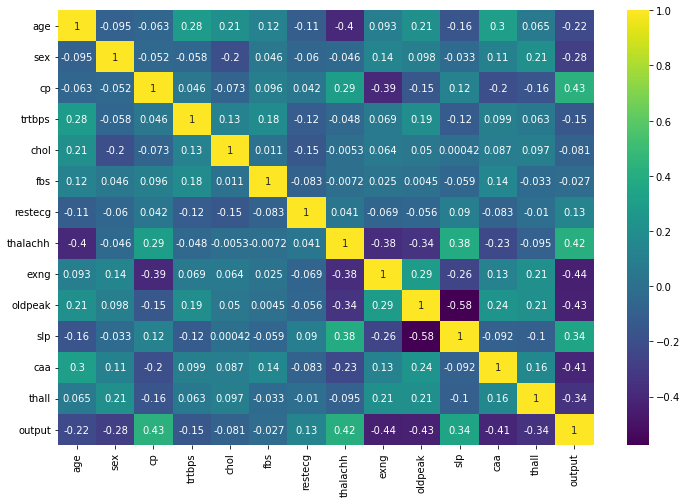

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis') 

# Target distribution

<AxesSubplot:xlabel='output', ylabel='count'>

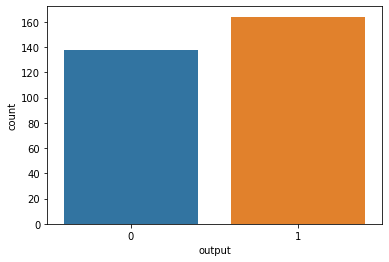

In [29]:
sns.countplot(x = data['output']) 

Target variable is quite balanced

In [176]:
X = data.drop(columns='output')
y = data['output']

# Training

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

# from gridsearchcv
{'rf__criterion': 'gini',
 'rf__max_depth': 4,
 'rf__max_features': 'auto',
 'rf__n_estimators': 200}

In [109]:
rf = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=200)
gbc = GradientBoostingClassifier(random_state=0)
models = [rf, gbc]

In [71]:
num_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_var = [col for col in X_train.columns if col not in num_var]

# num_prep = ColumnTransformer([('num_prepo', StandardScaler(), num_var)], 
# remainder='passthrough')

# rf_pipe = Pipeline([('preprocessor', num_prep), ('rf', rf)])

rf.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

# Performance

In [72]:

rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

gbc_pred = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_pred)

rf_accuracy, gbc_accuracy

(0.8524590163934426, 0.819672131147541)

In [81]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [110]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
num_prep = ColumnTransformer([('num_prepo', StandardScaler(), num_var)],
remainder='passthrough')
svc_pipe = Pipeline([('prep', num_prep), ('svc', svc )])
rf_pipe = Pipeline([('prep', num_prep), ('rf', rf )])


              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



C:\Users\ADMIN\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


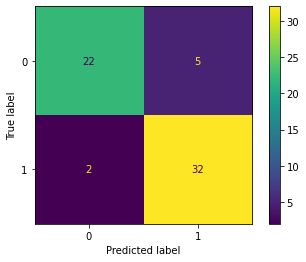

In [100]:

svc_pipe.fit(X_train,y_train)
svc_pred = svc_pipe.predict(X_test)
print(classification_report(y_test, svc_pred))
plot_confusion_matrix(svc_pipe, X_test, y_test);

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



C:\Users\ADMIN\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


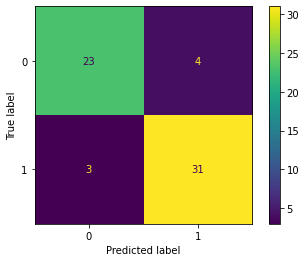

In [111]:
rf_pipe.fit(X_train,y_train)
rf_pred = rf_pipe.predict(X_test)
print(classification_report(y_test, rf_pred))
plot_confusion_matrix(rf_pipe, X_test, y_test);

## Hyperparameters tuning

In [102]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(remainder='passthrough',
                     transformers=[('num_prepo', StandardScaler(),
                                    ['age', 'trtbps', 'chol', 'thalachh',
                                     'oldpeak'])])),
  ('rf', RandomForestClassifier(random_state=0))],
 'verbose': False,
 'prep': ColumnTransformer(remainder='passthrough',
                   transformers=[('num_prepo', StandardScaler(),
                                  ['age', 'trtbps', 'chol', 'thalachh',
                                   'oldpeak'])]),
 'rf': RandomForestClassifier(random_state=0),
 'prep__n_jobs': None,
 'prep__remainder': 'passthrough',
 'prep__sparse_threshold': 0.3,
 'prep__transformer_weights': None,
 'prep__transformers': [('num_prepo',
   StandardScaler(),
   ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])],
 'prep__verbose': False,
 'prep__verbose_feature_names_out': True,
 'prep__num_prepo': StandardScaler(),
 'prep__num_prepo__copy':

In [105]:
# random_forest
param_grid = { 
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [4,5,6,7,8],
    'rf__criterion' :['gini', 'entropy']
}

gscv = GridSearchCV(rf_pipe, param_grid=param_grid).fit(X_train, y_train)

In [114]:
param_svc = {
    'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'svc__gamma': ['scale', 'auto'] }

gscv2 = GridSearchCV(svc_pipe, param_grid=param_svc).fit(X_train, y_train)

In [116]:
gscv2.best_params_

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

9.11764702879927
19.335704332279093
67.41406156138741
20.69717998891808
1.1575290137709378
8.802164824068116
16.361049128079426
43.09469296922536
25.046910956187883
1.2149128358683863

# Data enhancement

In [304]:
def data_enhancement(data):
    np.random.seed(0)
    gen_data = data
    sep_on = 'sex'
    divide_std_by = 12
    
    for value in data[sep_on].unique():
        sub_data =  gen_data[gen_data[sep_on] == value]

        age_std = sub_data['age'].std()
        
        trtbps_std = sub_data['trtbps'].std()
       
        chol_std = sub_data['chol'].std()
      
        thalachh_std = sub_data['thalachh'].std()
    
        oldpeak_std = sub_data['oldpeak'].std()
     
        
        for i in gen_data[gen_data[sep_on] == value].index:
            if np.random.randint(2) == 1:
                gen_data.loc[i,'age'] += age_std/divide_std_by
            else:
                gen_data.loc[i,'age'] -= age_std/divide_std_by
                
            if np.random.randint(2) == 1:
                gen_data.loc[i,'trtbps'] += trtbps_std/divide_std_by
            else:
                gen_data.loc[i,'trtbps'] -= trtbps_std/divide_std_by
                
            if np.random.randint(2) == 1:
                gen_data.loc[i,'chol'] += chol_std/divide_std_by
            else:
                gen_data.loc[i,'chol'] -= chol_std/divide_std_by
                
            if np.random.randint(2) == 1:
                gen_data.loc[i,'thalachh'] += thalachh_std/divide_std_by
            else:
                gen_data.loc[i,'thalachh'] -= thalachh_std/divide_std_by

            if np.random.randint(2) == 1:
                gen_data.loc[i,'oldpeak'] += oldpeak_std/divide_std_by
            else:
                gen_data.loc[i,'oldpeak'] -= oldpeak_std/divide_std_by

    return gen_data

gen = data_enhancement(data)

In [305]:
np.random.seed(0)
extra_data = gen.sample(gen.shape[0] // 4)

In [306]:
X_train_augm = pd.concat([X_train, extra_data.drop(['output'], axis=1 ) ])
y_train_augm = pd.concat([y_train, extra_data['output'] ])

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



C:\Users\ADMIN\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


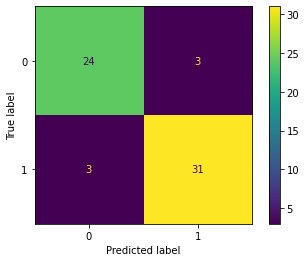

In [307]:
rf_pipe.fit(X_train_augm,y_train_augm)
rf_pred_augm = rf_pipe.predict(X_test)
print(classification_report(y_test, rf_pred_augm))
plot_confusion_matrix(rf_pipe, X_test, y_test);

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



C:\Users\ADMIN\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


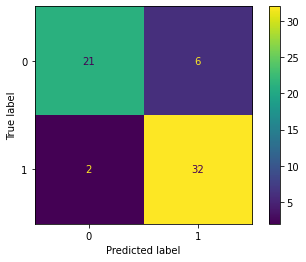

In [308]:
svc_pipe.fit(X_train_augm,y_train_augm)
svc_pred_augm = svc_pipe.predict(X_test)
print(classification_report(y_test, svc_pred_augm))
plot_confusion_matrix(svc_pipe, X_test, y_test);

Try with different feature to split on